In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
df1 = pd.read_csv('aau1043_dnm.tsv')
df2 = pd.read_csv('aau1043_parental_age.tsv')

In [8]:
df1

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [9]:
df2

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [23]:
df1['Phase_combined'].count()
df1_phase = df1.groupby('Phase_combined').count()

In [24]:
df1_phase

,Chr,Pos,Ref,Alt,Proband_id,Crossover,Sanger
Phase_combined,,,,,,,
father,20598,20598,20598,20598,20598,10,10
mother,5061,5061,5061,5061,5061,6,6


In [27]:
df1['Phase_combined'].value_counts()

father    20598
mother     5061
Name: Phase_combined, dtype: int64

In [77]:
tot_dnm = df1["Proband_id"].value_counts().rename_axis('probabd_id').reset_index(name = 'total')
pat_dnm = df1["Proband_id"][df1["Phase_combined"] == 'father'].value_counts().rename_axis('proband_id').reset_index(name = 'pat_total')
mat_dnm = df1["Proband_id"][df1["Phase_combined"] == 'mother'].value_counts().rename_axis('proband_id').reset_index(name = 'mat_total')

pat_dnm
mat_dnm

,proband_id,mat_total
0,112917,32
1,13191,31
2,101332,30
3,142988,29
4,14991,28
...,...,...
391,93086,4
392,130614,3
393,37789,3
394,113829,3


In [36]:
pat_dnm

91410     111
114094     98
111288     93
99984      91
64166      88
         ... 
76504      27
1097       26
13990      25
36430      25
37789      17
Name: Proband_id, Length: 396, dtype: int64

In [78]:
##pat_dnm_data = pd.DataFrame(data = pat_dnm)
##pat_dnm_data

##new_data = pd.DataFrame({"Proband_id":df1["Proband_id"], "pat_dnm": pat_dnm, "mat_dnm": mat_dnm, "total_dnm": tot_dnm})

##new_data

tot_dnm = df1["Proband_id"].value_counts().rename_axis('Proband_id').reset_index(name = 'total')
pat_dnm = df1["Proband_id"][df1["Phase_combined"] == 'father'].value_counts().rename_axis('Proband_id').reset_index(name = 'pat_total')
mat_dnm = df1["Proband_id"][df1["Phase_combined"] == 'mother'].value_counts().rename_axis('Proband_id').reset_index(name = 'mat_total')

merged_table = pat_dnm.merge(mat_dnm.merge(tot_dnm, on='Proband_id'), on = 'Proband_id')
merged_table

,Proband_id,pat_total,mat_total,total
0,91410,111,10,122
1,114094,98,22,121
2,111288,93,21,115
3,99984,91,12,103
4,64166,88,16,105
...,...,...,...,...
391,76504,27,5,34
392,1097,26,12,39
393,13990,25,7,33
394,36430,25,16,42


In [80]:
final_merge = merged_table.merge(df2, on = 'Proband_id')
final_merge

,Proband_id,pat_total,mat_total,total,Father_age,Mother_age
0,91410,111,10,122,51,34
1,114094,98,22,121,51,44
2,111288,93,21,115,53,44
3,99984,91,12,103,51,41
4,64166,88,16,105,41,40
...,...,...,...,...,...,...
391,76504,27,5,34,19,17
392,1097,26,12,39,19,19
393,13990,25,7,33,16,17
394,36430,25,16,42,35,26


In [ ]:
## Fit and interpret linear regression models

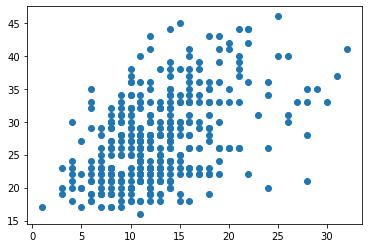

In [82]:
fig, ax = plt.subplots()
ax.scatter(final_merge["mat_total"], final_merge["Mother_age"])
plt.show()

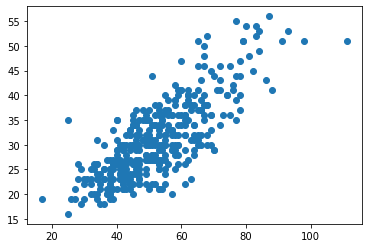

In [83]:
fig, ax = plt.subplots()
ax.scatter(final_merge["pat_total"], final_merge["Father_age"])
plt.show()

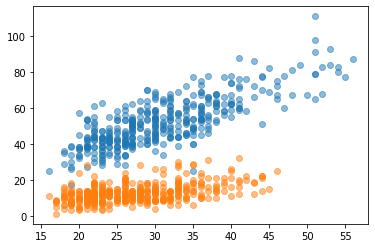

In [86]:
fig, ax = plt.subplots()
ax.scatter(final_merge["Father_age"], final_merge["pat_total"], alpha = 0.5)
ax.scatter(final_merge["Mother_age"], final_merge["mat_total"], alpha = 0.5)
plt.show()

In [90]:
model = smf.ols(formula = "mat_total ~ 1 + Mother_age", data = final_merge)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mat_total   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:14:58   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## P: good

In [ ]:
## There is a 0.3776 increase in mutations for each year

In [91]:
model = smf.ols(formula = "pat_total ~ 1 + Father_age", data = final_merge)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pat_total   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        14:17:01   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##p: good

In [ ]:
##The size is 1.3538

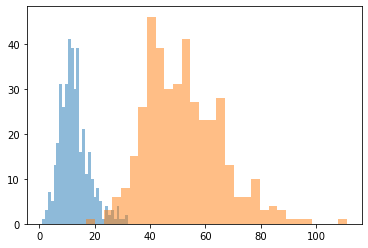

In [97]:
fig, ax = plt.subplots()
ax.hist(final_merge["mat_total"],bins =30, alpha = 0.5)
ax.hist(final_merge["pat_total"],bins =30, alpha = 0.5)
plt.show()

In [98]:
stats.ttest_ind(final_merge["mat_total"],final_merge["pat_total"])

Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

In [ ]:
stats.ttest_ind(final_merge["mat_total"][final_merge["Proband_id"] == "female"], 
                final_merge["pat_total"][final_merge["Proband_id"] == "female"])

In [ ]:
stats.ttest_ind(df_adelie["flipper_length_mm"][df_adelie["sex"] == "male"], 
                df_adelie["flipper_length_mm"][df_adelie["sex"] == "female"])

In [ ]:
##Generalized linear models

In [99]:
model = smf.poisson(formula = "mat_total ~ 1 + Mother_age", data = final_merge)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:              mat_total   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        14:36:05   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [118]:
model = smf.poisson(formula = "pat_total ~ 1 + Father_age", data = final_merge)
results = model.fit()
fat_results= model.fit()
results.summary()
##fat_results = results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5
Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:              pat_total   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        15:08:52   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [110]:
##fat_results = results.summary()

In [122]:
model_mvp = smf.poisson(formula = "mat_total ~ 1 + pat_total", data = final_merge)
mvp_results = model_mvp.fit()
mvp_results.summary()

Optimization terminated successfully.
         Current function value: 3.011762
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:              mat_total   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.04507
Time:                        17:23:23   Log-Likelihood:                -1192.7
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 2.662e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9885      0.055     36.355      0.000       1.881       2.096
pat_total      0.0105      0.001     10.793      0.000       0.009       0.012
==============================================================================
"""

In [ ]:
stats.ttest_ind(final_merge["mat_total"],final_merge["pat_total"])

In [112]:
fat_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:              pat_total   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        14:51:18   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [116]:
new_observation = pd.DataFrame({"Proband_id":'x', "Father_age":[50.5]})
new_observation

,Proband_id,Father_age
0,x,50.5


In [119]:
fat_results.predict(new_observation)

0    82.031316
dtype: float64